#### Cargamos las Librerias

In [1]:
#Librerias para el manejo de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Graficos
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style

#Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

#### Datos

In [2]:
df = pd.read_csv('C:/Users/diego/Desktop/Universidad/6to-Semestre/Aprendizaje_Inteligente/Aprendizaje_No_Supervisado/EjemploEstudiantes.csv', sep=';', decimal=',')
df

,Nombre,Matematicas,Ciencias,Espanol,Historia,EdFisica
0,Lucia,7.0,6.5,9.2,8.6,8.0
1,Pedro,7.5,9.4,7.3,7.0,7.0
2,Ines,7.6,9.2,8.0,8.0,7.5
3,Luis,5.0,6.5,6.5,7.0,9.0
4,Andres,6.0,6.0,7.8,8.9,7.3
5,Ana,7.8,9.6,7.7,8.0,6.5
6,Carlos,6.3,6.4,8.2,9.0,7.2
7,Jose,7.9,9.7,7.5,8.0,6.0
8,Sonia,6.0,6.0,6.5,5.5,8.7
9,Maria,6.8,7.2,8.7,9.0,7.0


#### Exploración Inicial

In [3]:
print('Media de cada variable')
# Media de cada variable
dfsiNombr = df.drop('Nombre', axis=1)
dfsiNombr.mean(axis=0)

Media de cada variable


Matematicas    6.79
Ciencias       7.65
Espanol        7.74
Historia       7.90
EdFisica       7.42
dtype: float64

In [4]:
print('Varianza de cada variable')
# Varianza de cada variable
dfsiNombr.var(axis=0)

Varianza de cada variable


Matematicas    0.905444
Ciencias       2.591667
Espanol        0.740444
Historia       1.257778
EdFisica       0.861778
dtype: float64

#### Modelo PCA

In [5]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(dfsiNombr)

# Se extrae el modelo entrenado del pipeline
pca_model = pca_pipe.named_steps['pca']


#### Interpretación

In [6]:
pd.DataFrame(
  data = pca_model.components_,
  columns = dfsiNombr.columns,
  index = ['PC' + str(i) for i in range(1, len(dfsiNombr.columns) + 1)]
)

,Matematicas,Ciencias,Espanol,Historia,EdFisica
PC1,-0.526644,-0.424936,-0.359147,-0.352697,0.537302
PC2,-0.270496,-0.508072,0.562082,0.586490,0.093746
PC3,0.438201,0.040495,0.562276,-0.394180,0.578626
PC4,-0.261218,0.673627,-0.070086,0.446645,0.523056
PC5,-0.623878,0.325390,0.483747,-0.420433,-0.306794


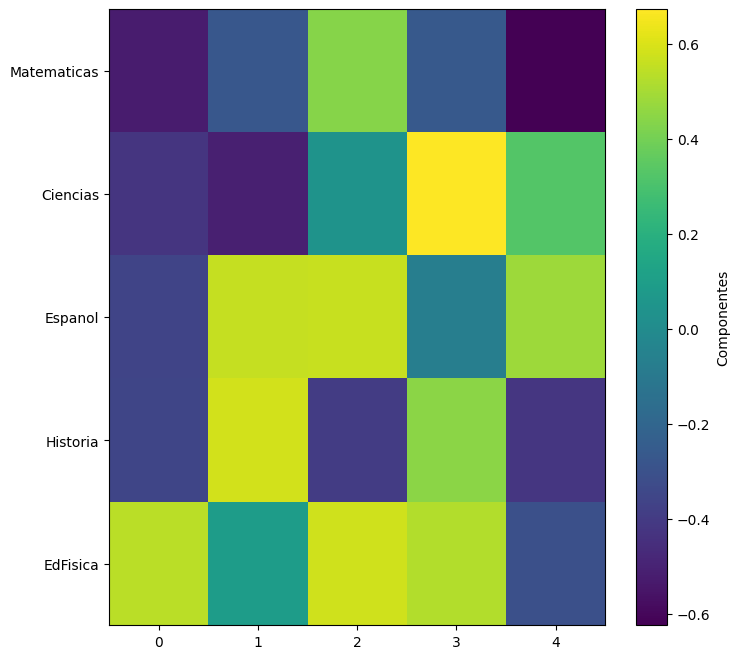

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
components = pca_model.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfsiNombr.columns)), dfsiNombr.columns)

plt.grid(False)
plt.colorbar(label='Componentes')

#### Porcentaje de varianza explicada por cada componente

Varianza explicada por cada componente
[0.57864993 0.32573008 0.06931921 0.02452249 0.00177828]


Text(0, 0.5, 'Porcentaje de varianza explicada')

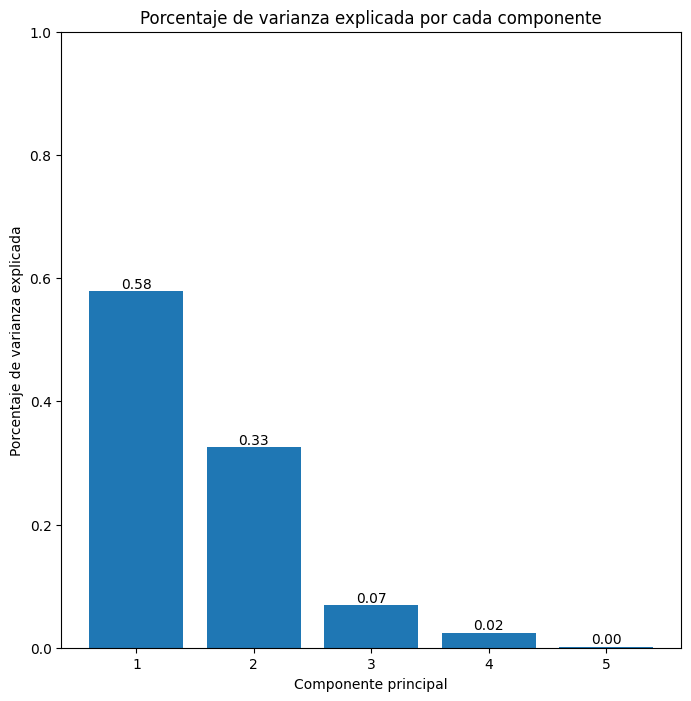

In [8]:
print('Varianza explicada por cada componente')
print(pca_model.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.bar(
  x = range(1, len(dfsiNombr.columns) + 1),
  height = pca_model.explained_variance_ratio_
)
for x, y in zip(range(1, len(dfsiNombr.columns) + 1), pca_model.explained_variance_ratio_):
  ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
ax.set_xticks(range(1, len(dfsiNombr.columns) + 1))
ax.set_ylim(0, 1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza explicada')

#### Porcentaje de Varianza explicada acumulada

Varianza explicada acumulada
[0.57864993 0.90438002 0.97369923 0.99822172 1.        ]


Text(0, 0.5, 'Porcentaje de varianza explicada acumulada')

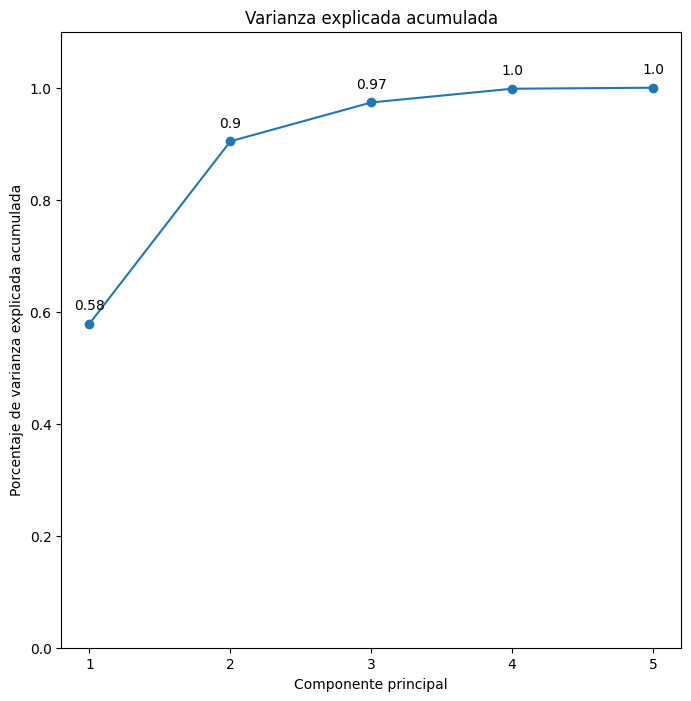

In [9]:
prop_var_acum = pca_model.explained_variance_ratio_.cumsum()
print('Varianza explicada acumulada')
print(prop_var_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.plot(
  np.arange(len(dfsiNombr.columns)) + 1,
  prop_var_acum,
  marker = 'o'
)
for x, y in zip(np.arange(len(dfsiNombr.columns)) + 1, prop_var_acum):
  label = round(y, 2)
  ax.annotate(
    label,
    (x, y),
    textcoords="offset points",
    xytext=(0,10),
    ha='center'
  )
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(len(dfsiNombr.columns)) + 1)
ax.set_title('Varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza explicada acumulada')



#### Transformación

In [10]:
proyecciones = pca_pipe.transform(dfsiNombr)
proyecciones = pd.DataFrame(
  proyecciones,
  columns = dfsiNombr.columns,
  index = ['Estudiante ' + str(i) for i in range(1, len(dfsiNombr) + 1)]
)
proyecciones


,Matematicas,Ciencias,Espanol,Historia,EdFisica
Estudiante 1,-0.323063,1.772525,1.198801,-0.055015,-0.003633
Estudiante 2,-0.665441,-1.638702,0.145476,-0.023065,0.123377
Estudiante 3,-1.002547,-0.515692,0.628888,0.516444,-0.142876
Estudiante 4,3.172095,-0.262782,-0.381960,0.677777,0.062504
Estudiante 5,0.488868,1.365402,-0.835236,-0.155792,-0.123367
Estudiante 6,-1.708633,-1.021700,-0.127077,0.066833,-0.025292
Estudiante 7,-0.067586,1.462336,-0.506240,-0.117928,-0.013124
Estudiante 8,-2.011855,-1.275865,-0.542150,-0.197787,-0.017434
Estudiante 9,3.042030,-1.254881,0.448829,-0.639999,-0.037885
Estudiante 10,-0.923869,1.369359,-0.029330,-0.071467,0.177730
